# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis: 
There is a correlation between latitude and temperature. As we move further from the equator the temperature drops.
There is no real correlation between latitude and cloudiness.
There is no real correlation between latitude and humidity.

In [1]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#!pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [4]:
cities

['albany',
 'quelimane',
 'vilaka',
 'yellowknife',
 'olafsvik',
 'barroualie',
 'grand river south east',
 'temaraia',
 'ushuaia',
 'chokurdakh',
 'saint-philippe',
 'namikupa',
 'samusu',
 'shingu',
 'atuona',
 'bluff',
 'kainantu',
 'nikolskoye',
 'aklavik',
 'qaanaaq',
 'nantucket',
 'georgetown',
 'bathsheba',
 'alofi',
 'kodinsk',
 'kapaa',
 'hobart',
 'lata',
 'avera',
 'castro',
 'lewisporte',
 'ponta delgada',
 'hermanus',
 'qazvin',
 'gibsons',
 'iskateley',
 'hasaki',
 'punta arenas',
 'peterborough',
 'vila franca do campo',
 'rikitea',
 'lokosovo',
 'talnakh',
 'leningradskiy',
 'atambua',
 'flinders',
 'balkanabat',
 'busselton',
 'kodiak',
 'tuktoyaktuk',
 'flin flon',
 'iqaluit',
 'bethel',
 'necochea',
 'ushumun',
 'yeletskiy',
 'bredasdorp',
 'thompson',
 'wajima',
 'victoria',
 'mehamn',
 'severo-kurilsk',
 'guerrero negro',
 'azare',
 'belushya guba',
 'jamestown',
 'carnarvon',
 'lompoc',
 'bargal',
 'bolungarvik',
 'tambopata',
 'padang',
 'pingxiang',
 'hilo',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

url_start= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
api_call = url_start + weather_api_key

In [6]:
citi_data = []

set_count = 1
record_count = 1
for ind, city in enumerate(cities):
    if (ind % 50 == 0 and ind >= 50):
        set_count += 1
        record_count = 0
    #create an endpoint url for each city
    city_url = api_call + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        citi_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | quelimane
Processing Record 3 of Set 1 | vilaka
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | olafsvik
Processing Record 6 of Set 1 | barroualie
City not found. Skipping...
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | temaraia
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | namikupa
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | kainantu
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | nantucket
Processing Record 22 

Processing Record 39 of Set 4 | chabahar
Processing Record 40 of Set 4 | andros
Processing Record 41 of Set 4 | nemuro
Processing Record 42 of Set 4 | opotiki
Processing Record 43 of Set 4 | esperance
Processing Record 44 of Set 4 | takoradi
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | abnub
Processing Record 47 of Set 4 | progreso
Processing Record 48 of Set 4 | giporlos
Processing Record 49 of Set 4 | fukue
Processing Record 0 of Set 5 | baykit
Processing Record 1 of Set 5 | te anau
Processing Record 2 of Set 5 | dunedin
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | coahuayana
Processing Record 5 of Set 5 | mogadishu
Processing Record 6 of Set 5 | sechura
Processing Record 7 of Set 5 | pimenta bueno
Processing Record 8 of Set 5 | marsa matruh
Processing Record 9 of Set 5 | kruisfontein
Processing Record 10 of Set 5 | siniscola
Processing Record 11 of Set 5 | battonya
Processing Record 12 of Set 5

Processing Record 30 of Set 8 | kadyy
Processing Record 31 of Set 8 | aripuana
Processing Record 32 of Set 8 | matay
Processing Record 33 of Set 8 | fort nelson
Processing Record 34 of Set 8 | codrington
Processing Record 35 of Set 8 | vrangel
Processing Record 36 of Set 8 | bronnitsy
Processing Record 37 of Set 8 | mikkeli
Processing Record 38 of Set 8 | itupiranga
Processing Record 39 of Set 8 | kousseri
Processing Record 40 of Set 8 | grants
Processing Record 41 of Set 8 | nancha
Processing Record 42 of Set 8 | esmeraldas
Processing Record 43 of Set 8 | moron
Processing Record 44 of Set 8 | buqayq
City not found. Skipping...
Processing Record 45 of Set 8 | kenai
Processing Record 46 of Set 8 | shizuishan
Processing Record 47 of Set 8 | adiake
Processing Record 48 of Set 8 | nouakchott
Processing Record 49 of Set 8 | cidreira
Processing Record 0 of Set 9 | vestmannaeyjar
Processing Record 1 of Set 9 | canaries
Processing Record 2 of Set 9 | smeeni
Processing Record 3 of Set 9 | azimu

Processing Record 17 of Set 12 | barguzin
Processing Record 18 of Set 12 | katima mulilo
Processing Record 19 of Set 12 | kiama
Processing Record 20 of Set 12 | borlange
City not found. Skipping...
Processing Record 21 of Set 12 | andenes
Processing Record 22 of Set 12 | tempoal
City not found. Skipping...
Processing Record 23 of Set 12 | roebourne
Processing Record 24 of Set 12 | kudat
Processing Record 25 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 26 of Set 12 | rafaela
Processing Record 27 of Set 12 | qarchi gak
Processing Record 28 of Set 12 | charlestown
Processing Record 29 of Set 12 | orbetello
Processing Record 30 of Set 12 | sterling
Processing Record 31 of Set 12 | manokwari
Processing Record 32 of Set 12 | avila
Processing Record 33 of Set 12 | nikolayevsk-na-amure
Processing Record 34 of Set 12 | isangel
Processing Record 35 of Set 12 | birin
Processing Record 36 of Set 12 | phan thiet
Processing Record 37 of Set 12 | mayumba
Processing Record 38 of

In [7]:
citi_data

[{'City': 'albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 21,
  'Humidity': 46,
  'Cloudiness': 12,
  'Wind Speed': 5.01,
  'Country': 'US',
  'Date': 1612038603},
 {'City': 'quelimane',
  'Lat': -17.8786,
  'Lng': 36.8883,
  'Max Temp': 82.4,
  'Humidity': 83,
  'Cloudiness': 40,
  'Wind Speed': 3.44,
  'Country': 'MZ',
  'Date': 1612038639},
 {'City': 'vilaka',
  'Lat': 57.1846,
  'Lng': 27.6722,
  'Max Temp': 21.96,
  'Humidity': 98,
  'Cloudiness': 87,
  'Wind Speed': 5.73,
  'Country': 'LV',
  'Date': 1612038639},
 {'City': 'yellowknife',
  'Lat': 62.456,
  'Lng': -114.3525,
  'Max Temp': -14.01,
  'Humidity': 76,
  'Cloudiness': 75,
  'Wind Speed': 3.44,
  'Country': 'CA',
  'Date': 1612038605},
 {'City': 'olafsvik',
  'Lat': 64.8945,
  'Lng': -23.7142,
  'Max Temp': 22.6,
  'Humidity': 91,
  'Cloudiness': 1,
  'Wind Speed': 19.28,
  'Country': 'IS',
  'Date': 1612038352},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 53.6,
  'Humidity': 54,
  'C

In [8]:
type(citi_data)

list

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
citi_data[0]

{'City': 'albany',
 'Lat': 42.6001,
 'Lng': -73.9662,
 'Max Temp': 21,
 'Humidity': 46,
 'Cloudiness': 12,
 'Wind Speed': 5.01,
 'Country': 'US',
 'Date': 1612038603}

In [13]:
citi_data[0]["Wind Speed"]

5.01

In [14]:
weather_data = pd.DataFrame(citi_data)
weather_data.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [15]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,21.00,46,12,5.01,US,1612038603
1,quelimane,-17.8786,36.8883,82.40,83,40,3.44,MZ,1612038639
2,vilaka,57.1846,27.6722,21.96,98,87,5.73,LV,1612038639
3,yellowknife,62.4560,-114.3525,-14.01,76,75,3.44,CA,1612038605
4,olafsvik,64.8945,-23.7142,22.60,91,1,19.28,IS,1612038352


In [16]:
# output data to csv
weather_data.to_csv("city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%
#no cities with greater than 100% humidity so skip this step

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

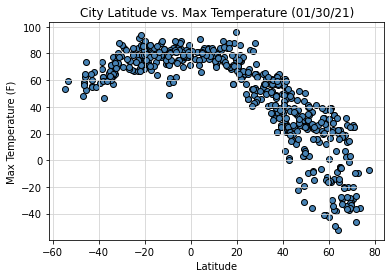

In [22]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Max Temperature (01/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('Lat vs. Temp.png')

## Latitude vs. Humidity Plot

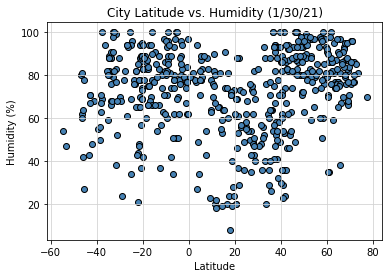

In [24]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Humidity (1/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('Lat vs Humidity.png')


## Latitude vs. Cloudiness Plot

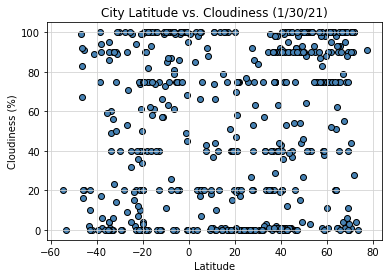

In [25]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Cloudiness (1/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('Lat vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

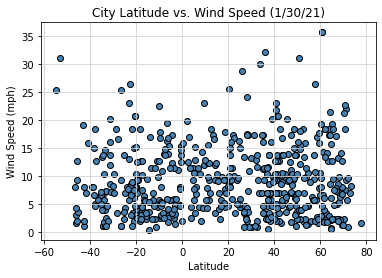

In [26]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Wind Speed (1/30/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig('Lat vs Wind Speed.png')

## Linear Regression

In [28]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) > 0, :]
southern_df = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.52x + 98.11
The r-squared is: -0.8499991189042831


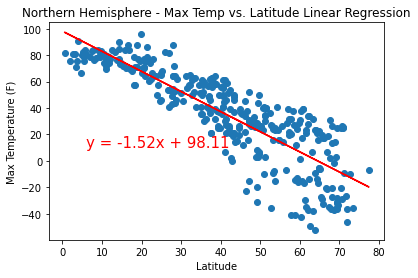

In [31]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.43x + 83.43
The r-squared is: 0.5996271225065848


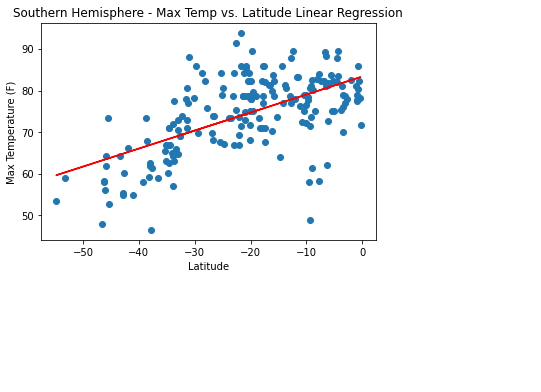

In [32]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.43x + 53.86
The r-squared is: 0.3975594495312249


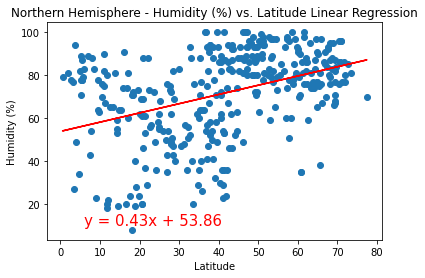

In [33]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.24x + 80.2
The r-squared is: 0.1850693213928274


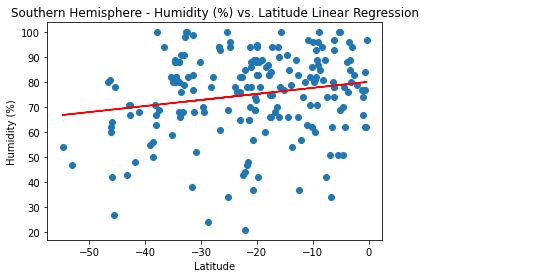

In [34]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.61x + 27.16
The r-squared is: 0.29348189072080777


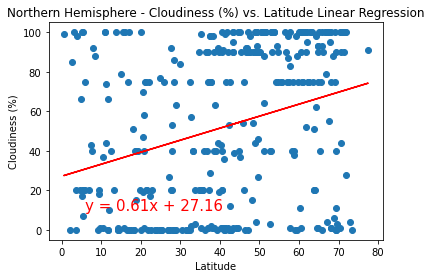

In [35]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 1.01x + 75.73
The r-squared is: 0.3317875170696136


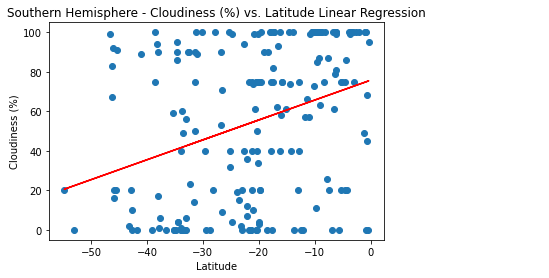

In [36]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.02x + 10.11
The r-squared is: -0.05258928698371851


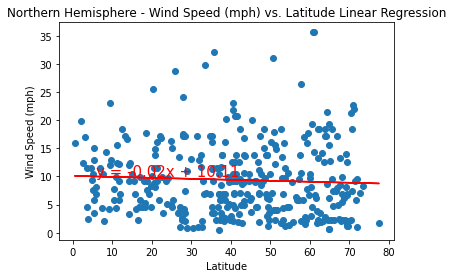

In [37]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.03x + 7.63
The r-squared is: -0.059352558226513495


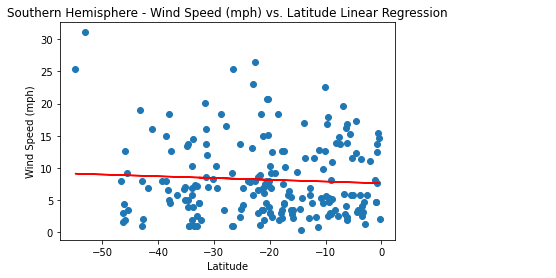

In [38]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()